In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [438]:
property_data=pd.read_csv('bengaluru_house_prices.csv')

In [440]:
property_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [442]:
property_data.shape

(13320, 9)

In [444]:
property_data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [446]:
property_data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [448]:
property_df= property_data.drop(['area_type','society','balcony','availability'],axis=1)

In [450]:
property_df.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [452]:
property_df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [454]:
property_df.dropna(inplace=True)

In [456]:
property_df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [458]:
property_df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [460]:
property_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [462]:
def adjust(x) :
    return int(x.split(' ')[0])


property_df['bhk']= property_df['size'].apply(adjust)


In [464]:
property_df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [466]:
property_df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

<Axes: xlabel='bhk'>

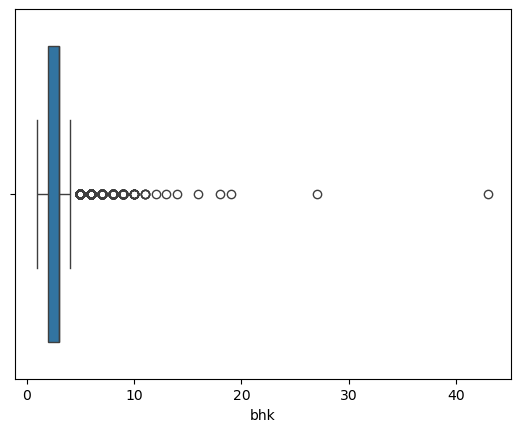

In [468]:
sns.boxplot(x=property_df['bhk'])


In [470]:
property_df[property_df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [472]:
property_df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [474]:
property_df.sample(300)

,location,size,total_sqft,bath,price,bhk
11648,JP Nagar,4 BHK,3200,5.0,309.0,4
9568,LB Shastri Nagar,3 BHK,1400,2.0,80.0,3
5099,Naganathapura,2 BHK,1103,2.0,55.0,2
756,Kudlu,2 BHK,1152,2.0,53.5,2
7152,Whitefield,3 BHK,1740,4.0,130.0,3
...,...,...,...,...,...,...
9583,Raja Rajeshwari Nagar,3 BHK,1757,3.0,98.0,3
8633,Bettadasanapura,5 Bedroom,1200,5.0,90.0,5
11045,Somasundara Palya,3 BHK,1650,3.0,126.0,3
12472,Electronic City,2 BHK,1342,2.0,90.0,2


In [476]:
def convert_to_sqft(val):
    try:
        if '-' in val:
            range_val= val.split('-')
            avg_val= (float(range_val[0].strip())+ float(range_val[1].strip()))
            return float(avg_val)
            
        
        else:
            return float(val.strip())

    except Exception as e: 
        return None
       




In [478]:
convert_to_sqft('32444-42444')

74888.0

In [480]:
property_df1=property_df.copy()
property_df1.total_sqft= property_df1['total_sqft'].apply( convert_to_sqft)

In [482]:
property_df1.sample(20)

,location,size,total_sqft,bath,price,bhk
12954,Bhagyalakshmi Avenue,1 BHK,540.0,1.0,22.50,1
4712,Yelahanka,5 Bedroom,4000.0,5.0,220.00,5
10730,Budigere,3 BHK,1820.0,3.0,99.00,3
1411,Banashankari Stage III,2 BHK,1145.0,2.0,58.40,2
2536,Hoodi,5 Bedroom,2400.0,5.0,160.00,5
4358,Jakkur,4 BHK,2283.0,4.0,130.00,4
10874,Yeshwanthpur,1 BHK,672.0,1.0,36.85,1
11104,Electronic City Phase II,2 BHK,1160.0,2.0,33.50,2
909,Sarjapur Road,3 Bedroom,2238.0,3.0,140.00,3
5620,Subramanyapura,3 BHK,1223.0,2.0,42.81,3


In [484]:
property_df2= property_df1.copy()

In [486]:
property_df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [488]:
property_df2['price_per_sqft']= property_df2['price']*100000/property_df2['total_sqft']

In [490]:
property_df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [492]:
property_df2['location'].sample(10)

1796             Veerannapalya
10715           Prithvi Layout
7826     Balaji Gardens Layout
3245            Subramanyapura
7157      Munivenkatppa Layout
1352         Maruthi Sevanagar
10666             Sonnenahalli
464             Chikkalasandra
12485             Thubarahalli
912                 Whitefield
Name: location, dtype: object

In [494]:
property_df2.location = property_df2.location.apply(lambda x: x.strip())

nloc= property_df2['location'].value_counts(ascending=True)
nloc

location
Abshot Layout                        1
Kanakadasa Layout                    1
Kengeri Satellite Town Stage II      1
Kasthuri Nagar East Of NGEF          1
Laxminarayana Layout                 1
                                  ... 
Thanisandra                        236
Kanakpura Road                     266
Electronic City                    304
Sarjapur  Road                     392
Whitefield                         535
Name: count, Length: 1293, dtype: int64

In [500]:
least_nloc = nloc[nloc<=10]
least_nloc



location
Abshot Layout                       1
Kanakadasa Layout                   1
Kengeri Satellite Town Stage II     1
Kasthuri Nagar East Of NGEF         1
Laxminarayana Layout                1
                                   ..
Gunjur Palya                       10
BTM 1st Stage                      10
Basapura                           10
1st Block Koramangala              10
Ganga Nagar                        10
Name: count, Length: 1052, dtype: int64

In [528]:
def adjust_loc(x):
    if x in least_nloc:
        return 'others'

    else:
        return x

property_df2['location']= property_df2['location'].apply(adjust_loc)



In [530]:
property_df2.location.sample(20)

1148                    others
7470                 Bellandur
211                Kammasandra
7014                    others
11329              Thanisandra
4277              Haralur Road
9290            Sarjapur  Road
10804           Horamavu Agara
7328                    others
10797          Electronic City
11327                   Kogilu
5656         Kodichikkanahalli
6970              Haralur Road
1174              Haralur Road
5702                Whitefield
3963                    Kogilu
8836        6th Phase JP Nagar
6115                Whitefield
1417                    others
10151    Banashankari Stage VI
Name: location, dtype: object

In [536]:
property_df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1573.105100,2.692586,112.389392,2.801902,7.893298e+03
std,1266.432547,1.341506,149.076587,1.295758,1.067281e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.230769e+03
50%,1280.000000,2.000000,72.000000,3.000000,5.416667e+03
75%,1685.000000,3.000000,120.000000,3.000000,7.307692e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [538]:
#Lets keep minimum threshhold per room be 300
property_df3= property_df2.query('total_sqft / bhk >= 300')

In [540]:
property_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12456 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12456 non-null  object 
 1   size            12456 non-null  object 
 2   total_sqft      12456 non-null  float64
 3   bath            12456 non-null  float64
 4   price           12456 non-null  float64
 5   bhk             12456 non-null  int64  
 6   price_per_sqft  12456 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 778.5+ KB


In [542]:
property_df3.price_per_sqft.describe()

count     12456.000000
mean       6279.401704
std        4183.497599
min         267.829813
25%        4181.818182
50%        5277.777778
75%        6904.236038
max      176470.588235
Name: price_per_sqft, dtype: float64

In [544]:
print(property_df3.groupby('location')['price_per_sqft'].mean())

location
1st Block Jayanagar          12359.253758
1st Phase JP Nagar            9726.405918
2nd Phase Judicial Layout     4048.701183
2nd Stage Nagarbhavi         14381.275720
5th Block Hbr Layout          6622.120076
                                 ...     
Yelahanka                     5122.556847
Yelahanka New Town            5860.659870
Yelenahalli                   4012.550871
Yeshwanthpur                  6487.416213
others                        7465.084077
Name: price_per_sqft, Length: 242, dtype: float64


In [546]:
print(property_df3.groupby('location')['price_per_sqft'].std())

location
1st Block Jayanagar          3931.939592
1st Phase JP Nagar           4802.127570
2nd Phase Judicial Layout     674.730658
2nd Stage Nagarbhavi         5272.435848
5th Block Hbr Layout         4675.410553
                                ...     
Yelahanka                    1808.393955
Yelahanka New Town           3889.233175
Yelenahalli                   533.259531
Yeshwanthpur                 2108.520032
others                       6418.761379
Name: price_per_sqft, Length: 242, dtype: float64


In [560]:
def handle_outliers(df):
    out = pd.DataFrame()
    for val, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        out = pd.concat([out,reduced_df],ignore_index=True)
    return out
property_df4= handle_outliers(property_df3)

In [562]:
property_df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [566]:
property_df4.location.nunique()

242

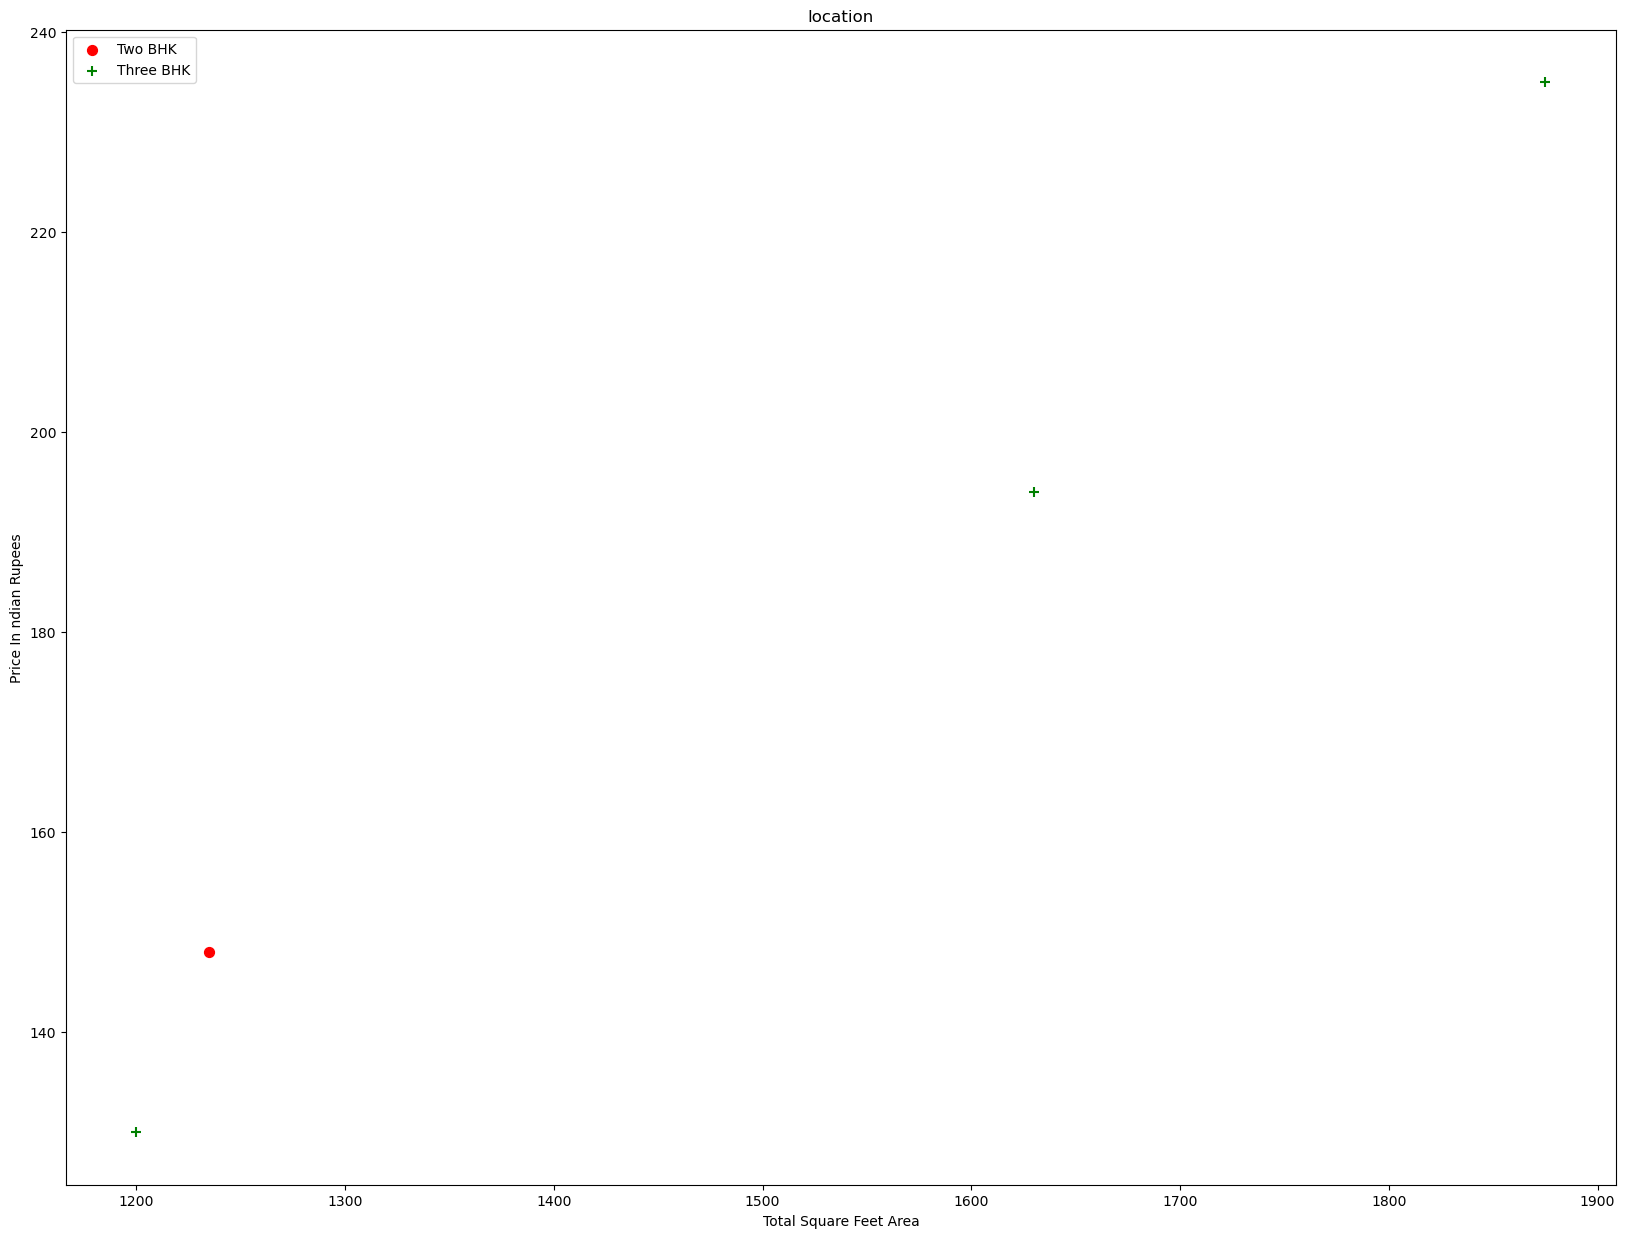

In [584]:
def scatter_plot(df, loc):
    bhk_count_2= df[(df.location==loc) & (df.bhk==2)]
    bhk_count_3= df[(df.location==loc) & (df.bhk==3)]
    plt.figure(figsize=(20,15))
    plt.scatter('total_sqft','price', data=bhk_count_2, color= 'red', label='Two BHK', s=50)
    plt.scatter('total_sqft','price', data=bhk_count_3, marker='+', color= 'green', label='Three BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price In ndian Rupees")
    plt.title('location')
    plt.legend()
    
scatter_plot(property_df4,"1st Block Jayanagar")

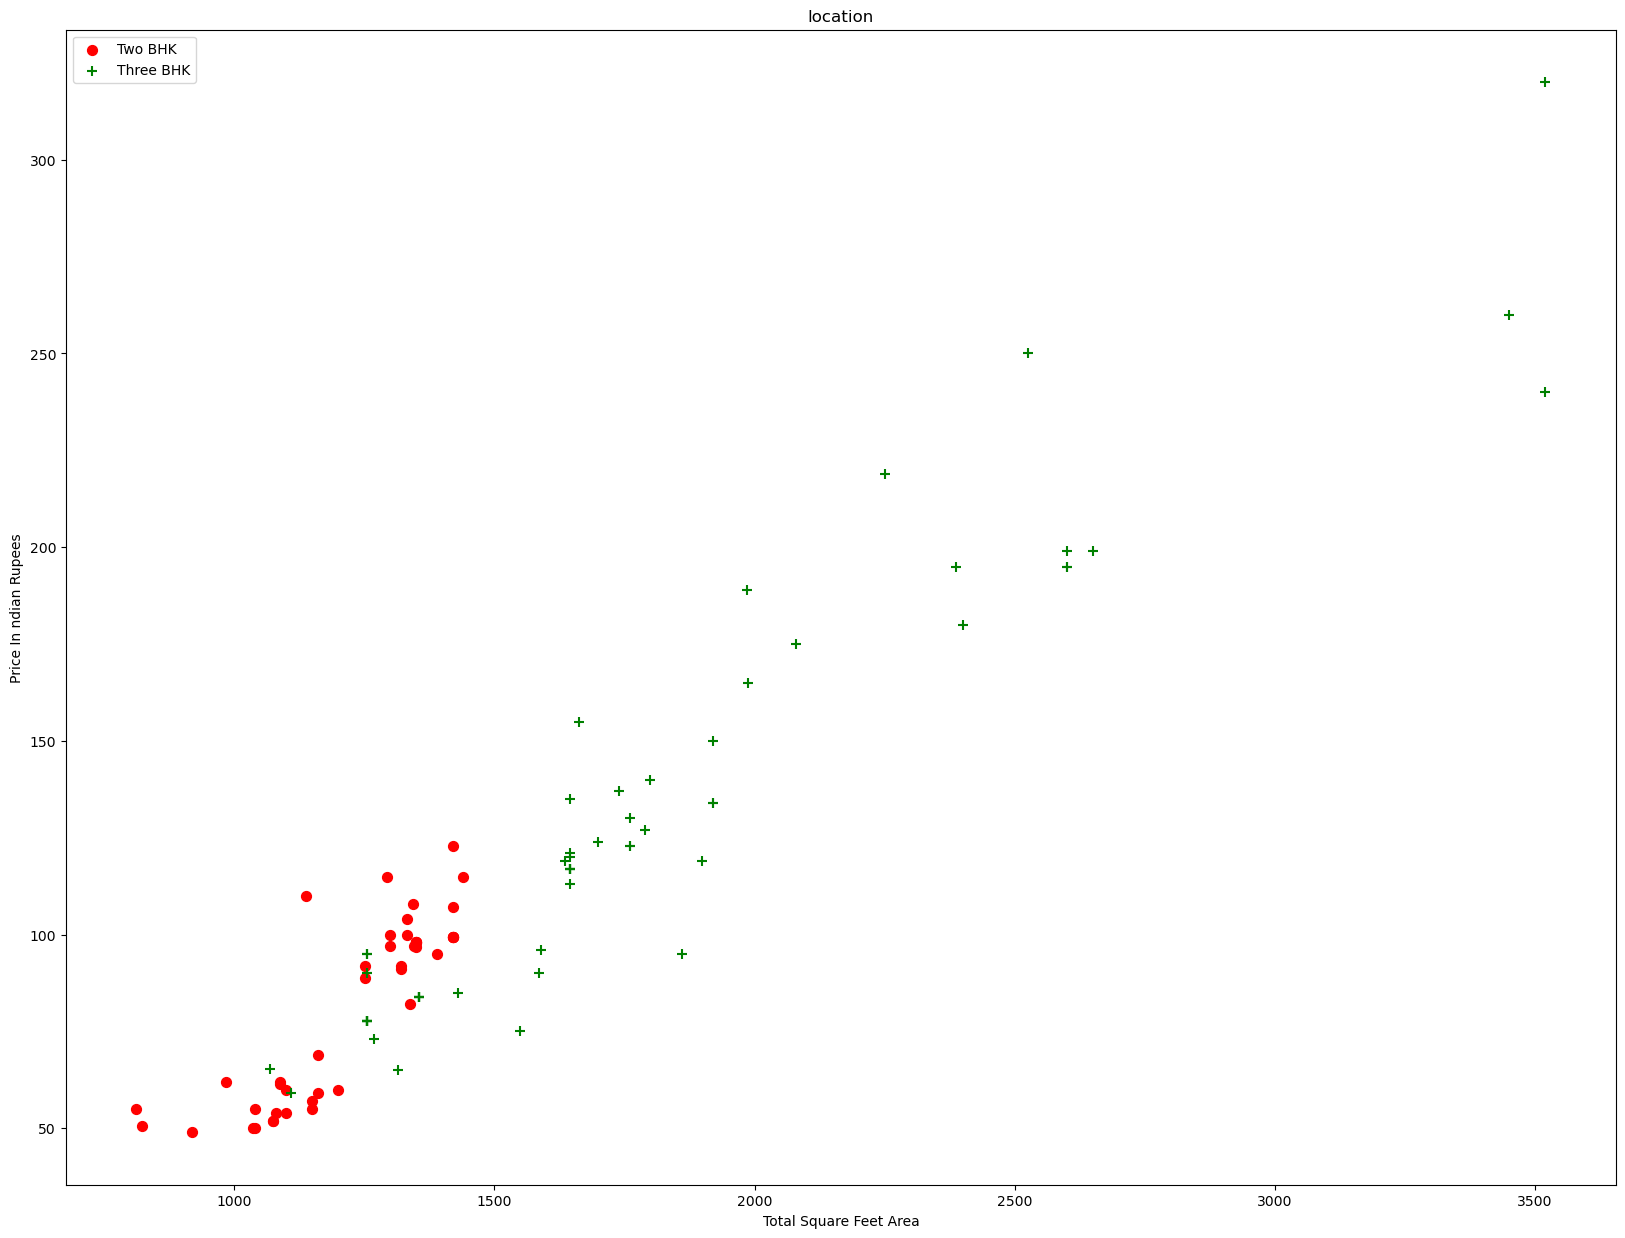

In [586]:
scatter_plot(property_df4,"Hebbal")

Text(0, 0.5, 'Count')

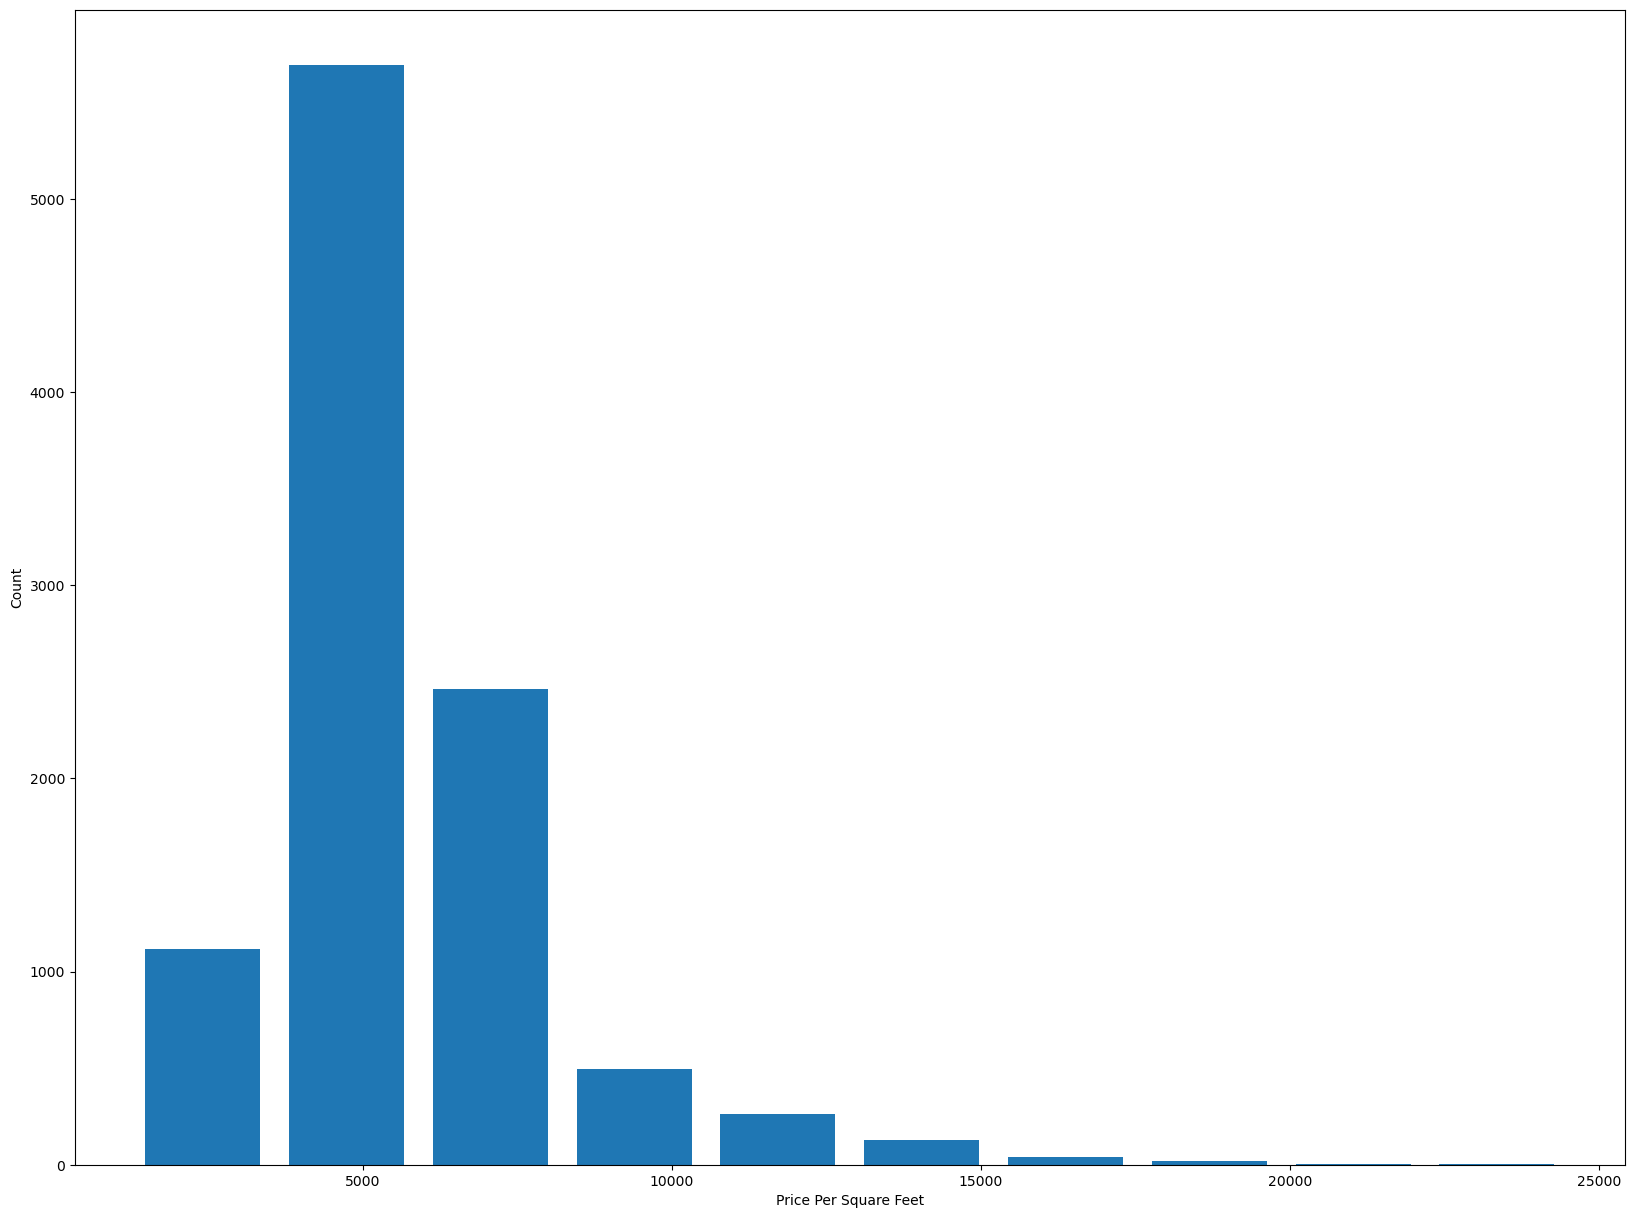

In [591]:
plt.figure(figsize=(20,15))
plt.hist(property_df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

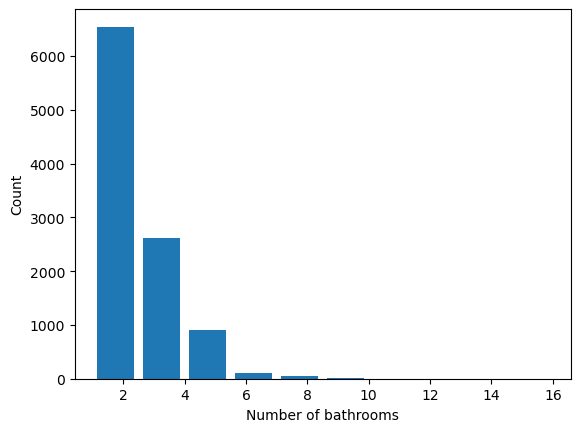

In [593]:

plt.hist(property_df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [595]:
property_df4[property_df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5268,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8467,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8556,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9289,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9620,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [603]:
property_df5 = property_df4[property_df4.bath<property_df4.bhk+2]

In [605]:
property_df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10217,others,2 BHK,1353.0,2.0,110.00,2,8130.081301
10218,others,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10219,others,3 BHK,1440.0,2.0,63.93,3,4439.583333
10220,others,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [609]:
property_df6=  property_df5.drop(['size','price_per_sqft'], axis='columns')
property_df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10137 entries, 0 to 10221
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10137 non-null  object 
 1   total_sqft  10137 non-null  float64
 2   bath        10137 non-null  float64
 3   price       10137 non-null  float64
 4   bhk         10137 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 475.2+ KB


In [611]:
dummies= pd.get_dummies(property_df6.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [613]:
dummies_binary = dummies.applymap(lambda x: 1 if x else 0)


/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_1602/3791243712.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dummies_binary = dummies.applymap(lambda x: 1 if x else 0)


In [615]:
import warnings
warnings.simplefilter(action= 'ignore', category= FutureWarning)

In [617]:
dummies_binary

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [621]:
property_df7= property_df6.merge(dummies_binary, left_index=True, right_index=True)

In [627]:
property_df7=property_df7.drop('location',axis=1)

In [629]:
property_df8= property_df7.drop('2nd Stage Nagarbhavi', axis=1)


In [633]:
property_df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [637]:
property_df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10137 entries, 0 to 10221
Columns: 245 entries, total_sqft to others
dtypes: float64(3), int64(242)
memory usage: 19.0 MB


In [641]:
property_df8.shape

(10137, 245)

In [643]:
X= property_df8.drop('price', axis=1)

In [647]:
y= property_df8.price

In [653]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=10)

In [661]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




In [681]:
def optimal_model(X,y):
    models={
        'linear_regression':{
            'model': LinearRegression(),
            'params':{}
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        }
    }
    scores=[]
    best_estimators={}
    
    for model_name, config in models.items():
        grid_search= GridSearchCV(estimator=config['model'],
                                 param_grid=config['params'],
                                 cv=5,
                                 n_jobs=1,
                                 verbose=2,
                                 scoring='neg_mean_squared_error')
        grid_search.fit(X,y)
        best_estimators[model_name]= grid_search.best_estimator_
        
        scores.append({
            
            'model': model_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })
    return pd.DataFrame(scores), best_estimators



        
    
    

In [683]:
optimal_model(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_

(               model    best_score  \
 0  linear_regression -1.949995e+20   
 1      decision_tree -2.422580e+03   
 2      random_forest -2.347712e+03   
 3  gradient_boosting -2.466845e+03   
 
                                          best_params  
 0                                                 {}  
 1  {'max_depth': 10, 'min_samples_leaf': 4, 'min_...  
 2  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...  
 3  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...  ,
 {'linear_regression': LinearRegression(),
  'decision_tree': DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5),
  'random_forest': RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                        n_estimators=50),
  'gradient_boosting': GradientBoostingRegressor(min_samples_leaf=4, n_estimators=200)})

In [685]:


from sklearn.linear_model import LinearRegression
lrr_model = LinearRegression()
lrr_model.fit(X_train,y_train)
lrr_model.score(X_test,y_test)


0.8296902311491321

In [721]:
def estimate_price(location,sqft,bath,bhk):
    area_indx= np.where(X.columns==location)[0][0]
    
    features=np.zeros(len(X.columns))
    features[0]= sqft
    features[1]= bath
    features[2]= bhk
    if area_indx >= 0:
        features[area_indx] = 1

    return lrr_model.predict([features])[0]

In [727]:
estimate_price('whitefield',2000, 4, 3)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


136.4432355021494